## _in Back transaction language "0=Not Fraud" and "1=Fraud"_

In [123]:
# import libs

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [50]:
df = pd.read_csv("creditcard.csv")
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2713,2252.0,-0.608293,0.534703,2.437976,0.012105,-0.305314,0.360343,0.003408,0.301774,-0.062306,...,0.029949,0.204280,-0.217892,0.055265,-0.100031,0.296647,0.091340,0.098176,11.50,0
193816,130305.0,-0.210333,1.000308,-0.104795,-0.617489,0.974269,-0.237943,0.929591,-0.099179,0.282137,...,-0.002606,0.532552,-0.240566,0.670408,-0.096127,0.511151,0.223817,-0.028438,2.00,0
69190,53308.0,1.236709,0.180865,0.488985,0.634057,-0.528048,-0.996246,0.049564,-0.184679,0.107453,...,-0.255155,-0.786011,0.130241,0.363866,0.199339,0.094968,-0.034111,0.020198,13.99,0
6316,7479.0,-1.047116,-0.363618,0.257035,-0.529577,1.749841,3.871239,-1.285001,1.493708,1.520016,...,-0.180904,-0.598526,0.155799,1.023074,-0.610038,0.965843,-0.028608,-0.023810,61.19,0
53031,45780.0,1.066006,-0.111050,1.281768,1.173960,-0.710043,0.603813,-0.720756,0.360640,0.584978,...,0.020390,0.276106,0.008544,0.036260,0.321868,-0.397856,0.086887,0.025445,9.99,0


In [51]:
X = df.drop(columns=['Time', 'Amount', 'Class'])
y = df['Class']

In [52]:
y.value_counts()

# 0 = Not Fraud
# 1 = Fraud

0    284315
1       492
Name: Class, dtype: int64

### _We will use Logistics Regression as it is used for Catagories/ classes_

In [53]:
# importing Logistic Regression lib
from sklearn.linear_model import LogisticRegression

In [54]:
# lr = LogisticRegression()
lr = LogisticRegression(class_weight={0:1,1:2})

# Q = what is the best ration for Fraud detection/ 1 ?      Find answer using GridSearchCV

In [55]:
lr.fit(X,y)

LogisticRegression(class_weight={0: 1, 1: 2})

In [56]:
pred_y = lr.predict(X)

In [57]:
pred_y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

* we can not use numpy arrays for value counts so we need to convert above funtion into dataset/ df

In [106]:
df_pred = pd.DataFrame(pred_y)

In [107]:
df_pred.value_counts()

0    284370
1       437
dtype: int64

In [108]:
lr.get_params()

# we use get_param to find the functions of Logistics Regression or LR

{'C': 1.0,
 'class_weight': {0: 1, 1: 2},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [109]:
# grid = GridSearchCV(
#             estimator=LogisticRegression(),
#             param_grid={'class_weight': [{0: 1, 1: number} for number in range(1,10)]},
#             cv=5
# )

# to find the best result run the above function.

grid = GridSearchCV(
            estimator=LogisticRegression(),
            param_grid={'class_weight': [{0: 1, 1: 6}]},
            cv=5
)

# we put 1:6 because we did found that it will fit best using rank in GridSearchCV

<IPython.core.display.Javascript object>

In [110]:
# Avoid running the this function as it will take a lot of time.
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 6}]})

### _Import precision_score and recall_score form sklearn.metrics_
* to check the best result from the class_weight function

In [111]:
from sklearn.metrics import precision_score, recall_score

In [112]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.012276,0.51239,0.033115,0.003809,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.998964,0.999579,0.998982,0.999438,0.99928,0.999249,0.000244,1


## _put the 'class_weight': from params with rank_test_score = 1_

In [113]:
df_pred1 = pd.DataFrame(pred_y)

In [114]:
df_pred1.value_counts()

0    284370
1       437
dtype: int64

In [115]:
precision_score(y,pred_y)

0.8283752860411899

### _Finding F1 score_
* It is harmonic mean of Precision score and Recall score

In [116]:
from sklearn.metrics import f1_score

In [117]:
# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

f1_score(y, pred_y)

0.7793326157158235

## _Finding Confusion metrix_

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
confusion_matrix(y,pred_y)

array([[284240,     75],
       [   130,    362]], dtype=int64)

In [120]:
# confusion metrics using seaborn
c_matrix = pd.crosstab(y, pred_y, rownames=['Actual'], colnames=['Predicted'])
c_matrix

Predicted,0,1
Actual,,
0,284240,75
1,130,362


<AxesSubplot:>

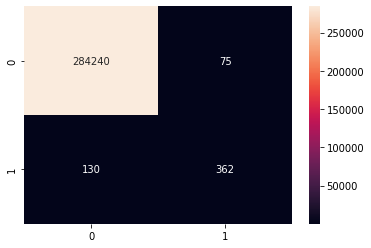

In [129]:
#plot confusion metrix
sns.heatmap(confusion_matrix(y, pred_y), annot=True, fmt='d')